In [1]:
from scipy import sparse
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data
data_sparse = sparse.load_npz("data_prepared_final.npz")

# 2. SVD
svd = TruncatedSVD(n_components=14, random_state=42)
data_reduced = svd.fit_transform(data_sparse)

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_reduced)


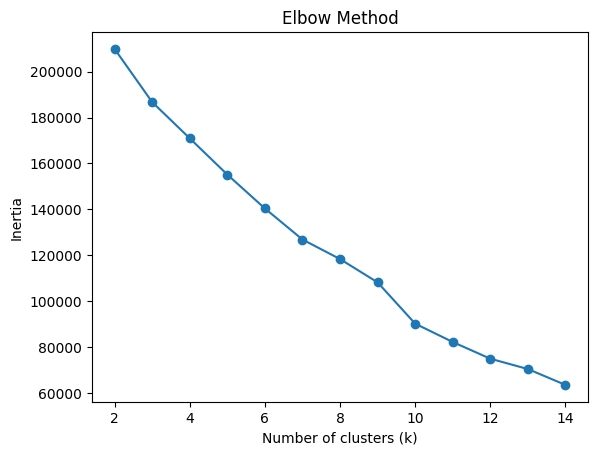

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


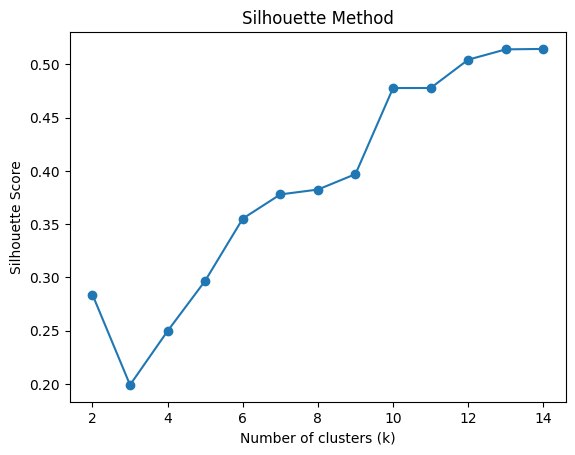

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    scores.append(score)

plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [ ]:
optimal_k=12
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(data_scaled)
labels = kmeans.labels_

score = silhouette_score(data_scaled, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.5043399719109504
